In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('car.csv')
df

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
df.dtypes

Buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [6]:
df.columns

Index(['Buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df.isnull().sum()

Buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [10]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [13]:
dfcorr=df.corr()
dfcorr

,Buying,maint,doors,persons,lug_boot,safety,class
Buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
class,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


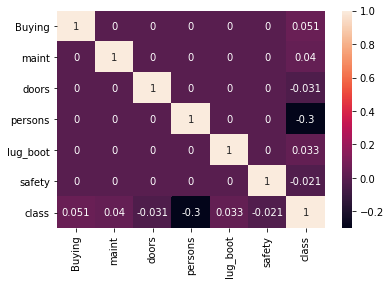

In [12]:
sns.heatmap(dfcorr, annot=True)

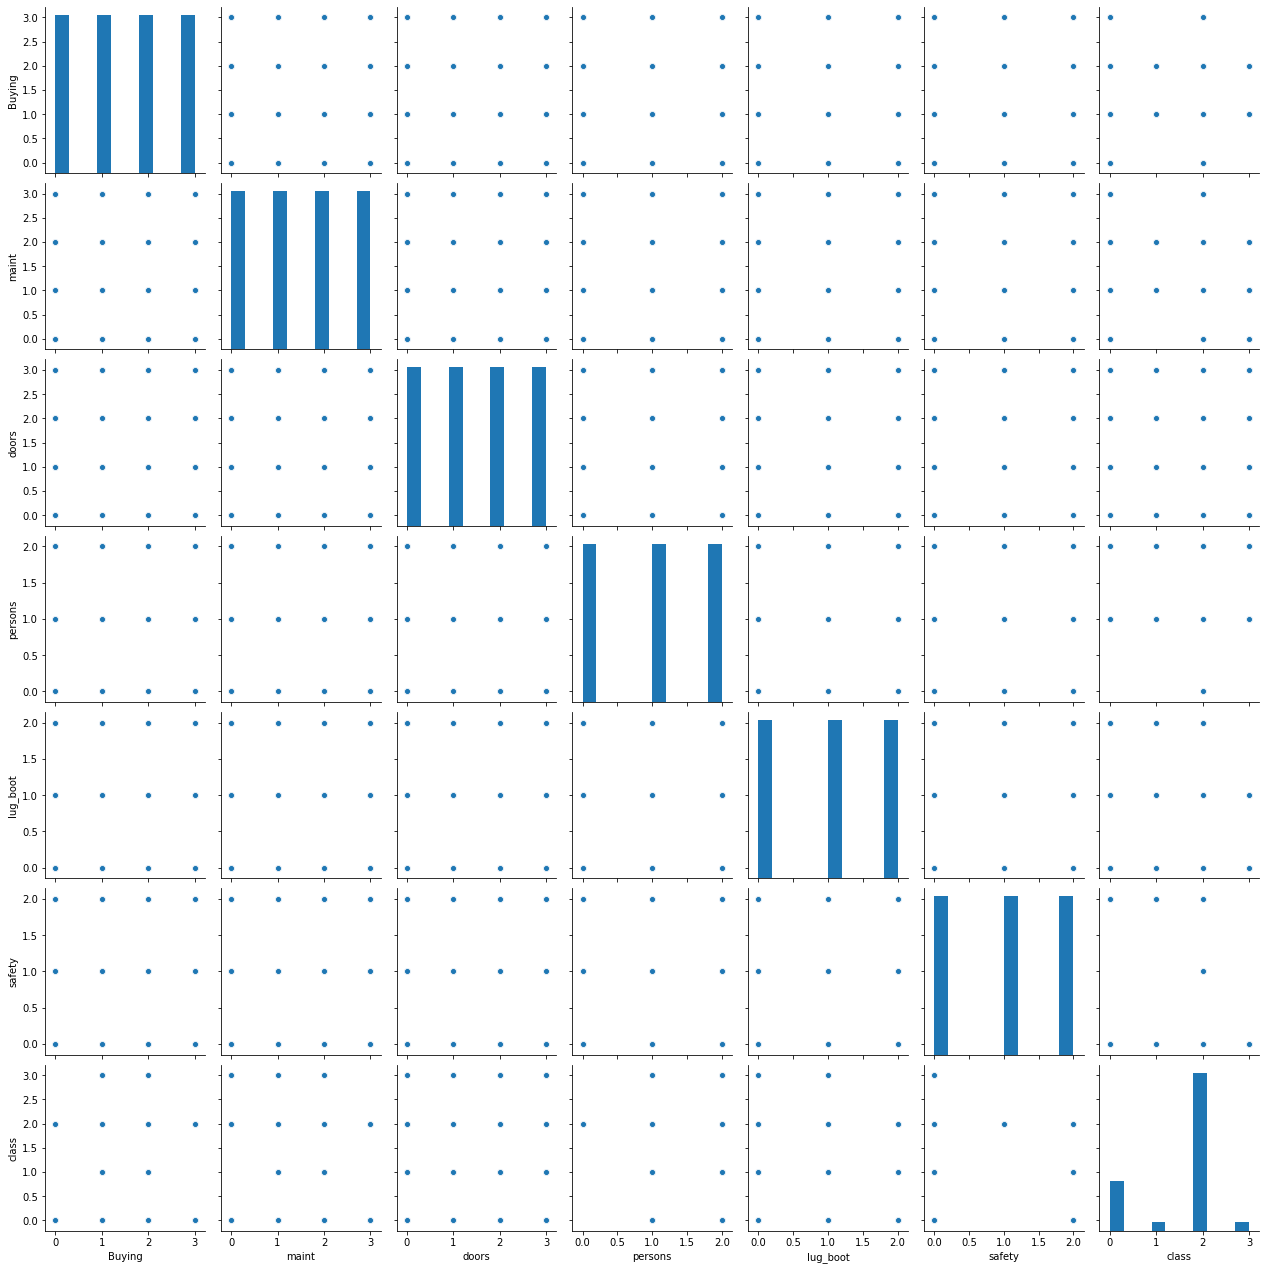

In [14]:
sns.pairplot(df)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [16]:
X=df.drop(['class'], axis=1)
y=df['class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [18]:
rf = RandomForestClassifier()

In [19]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rf.score(X_test,y_test)

0.9682080924855492

In [21]:
df = DecisionTreeClassifier()

In [22]:
df.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
df.score(X_test,y_test)

0.9682080924855492

In [24]:
y_pred = df.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346



In [28]:
cm=confusion_matrix(y_test,df.predict(X_test))

In [29]:
print(cm)

[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


In [30]:
from sklearn import preprocessing, neighbors

In [31]:
clf = neighbors.KNeighborsClassifier()

In [32]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
clf.score(X_test,y_test)

0.8930635838150289

In [34]:
gaus=GaussianNB()

In [35]:
gaus.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
gaus.score(X_test,y_test)

0.6242774566473989

In [37]:
ET=ExtraTreesClassifier()

In [38]:
ET.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [39]:
ET.score(X_test,y_test)

0.9797687861271677

In [40]:
y_pred = ET.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        83
           1       0.85      1.00      0.92        11
           2       0.99      1.00      0.99       235
           3       0.94      0.94      0.94        17

    accuracy                           0.98       346
   macro avg       0.94      0.97      0.95       346
weighted avg       0.98      0.98      0.98       346



In [55]:
cm=confusion_matrix(y_test,ET.predict(X_test))

In [56]:
print(cm)

[[ 77   2   3   1]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]


In [44]:
ad=AdaBoostClassifier()

In [45]:
ad.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [46]:
ad.score(X_test,y_test)

0.7861271676300579

In [47]:
lm=LogisticRegression()

In [48]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
lm.score(X_test,y_test)

0.6589595375722543

In [50]:
gb = GradientBoostingClassifier()

In [51]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [52]:
gb.score(X_test,y_test)

0.9653179190751445

In [53]:
y_pred = gb.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.55      1.00      0.71        11
           2       0.99      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.93      0.89       346
weighted avg       0.98      0.97      0.97       346



In [57]:
cm=confusion_matrix(y_test,gb.predict(X_test))

In [58]:
print(cm)

[[ 74   7   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


In [59]:
model=SVC()

In [60]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
model.score(X_test,y_test)

0.9132947976878613

In [62]:
from sklearn.externals import joblib

C:\Users\sodainmind\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [63]:
joblib.dump(SVC,'car.csv')

['car.csv']

In [64]:
model=joblib.load('car.csv')

In [65]:
model

sklearn.svm._classes.SVC